## Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation
%matplotlib inline

## Read Dataset

In [ ]:
#devotional = pd.read_csv('hindi_devotional_songs.csv')
#devotional = pd.read_csv('sanskrit_devotional_songs.csv')
#devotional = pd.read_csv('gujarati_devotional_songs.csv')
#devotional = pd.read_csv('marathi_devotional_songs.csv')
#devotional = pd.read_csv('punjabi_devotional_songs.csv')
#devotional = pd.read_csv('malayalam_devotional_songs.csv')
#devotional = pd.read_csv('tamil_devotional_songs.csv')
devotional = pd.read_csv('telugu_devotional_songs.csv')
devotional.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Language
0,spotify:track:07MBmkLZClagalPWHiVdBn,Sri Venkatesa Suprabatham,spotify:artist:1aCXz3s5Uo0oOX3jp1hPb4,Anuradha Krishnamoorthy,spotify:album:0lM42LruNYoV8YYwBs655y,Suprabatham,spotify:artist:1aCXz3s5Uo0oOX3jp1hPb4,Anuradha Krishnamoorthy,21-11-1999,https://i.scdn.co/image/ab67616d0000b273e0f77d...,...,-5.947,1,0.0541,0.766,0.00000,0.0895,0.835,86.747,3,Telugu
1,spotify:track:7sRyejjZ7Ebkgo1sy6Gmfj,Shree Ganeshay Dheemahi,spotify:artist:5fvTHKKzW44A9867nPDocM,Ajay-Atul,spotify:album:7pBI5ObmHmMbFi537wORHH,Ganesha Symphonic Chants Experience,spotify:artist:5fvTHKKzW44A9867nPDocM,Ajay-Atul,2001,https://i.scdn.co/image/ab67616d0000b273a55cbf...,...,-15.063,0,0.0331,0.728,0.00000,0.1020,0.512,139.832,4,Telugu
2,spotify:track:1BqjKWtv2ipp2eF0MgVLeI,Kondalalo Nelakonna,"spotify:artist:4ik94hI7KwXxr7Tth6inQH, spotify...","Annamayya Keerthana, S. P. Balasubrahmanyam",spotify:album:6rMl6JDfVR3Nz2VCTeSoGg,Annamayya,spotify:artist:12l1SqSNsg2mI2IcXpPWjR,M. M. Keeravani,01-01-1997,https://i.scdn.co/image/ab67616d0000b2739b87d7...,...,-8.058,1,0.0903,0.536,0.00754,0.2730,0.611,77.854,4,Telugu
3,spotify:track:3BM77eR1tvoUmwkQrfUdlk,Paluke Bangaramayera,"spotify:artist:12l1SqSNsg2mI2IcXpPWjR, spotify...","M. M. Keeravani, K. S. Chithra",spotify:album:3EyrNf6BihkBZxnbM6h6q2,Sri Ramadasu,spotify:artist:12l1SqSNsg2mI2IcXpPWjR,M. M. Keeravani,13-01-2006,https://i.scdn.co/image/ab67616d0000b273c18bc2...,...,-7.138,0,0.0279,0.672,0.00000,0.0810,0.492,95.933,4,Telugu
4,spotify:track:74VFvLwTnReHu8RFHaahx7,Andhari Bhanduvayya,spotify:artist:2ae6PxICSOZHvjqiCcgon8,S. P. Balasubrahmanyam,spotify:album:71EAAUyMdzabE30Dwu5NcQ,Devullu,spotify:artist:6X7Q0PvITPOqe8vg4BW7Ib,Vandemataram Srinivas,09-05-2001,https://i.scdn.co/image/ab67616d0000b273fa44f2...,...,-5.127,0,0.0856,0.187,0.00000,0.7370,0.703,89.943,4,Telugu


In [ ]:
devotional.tail()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Language
632,spotify:track:096I6QMUdYVwrvzWsqCF93,Narayana Manthram,spotify:artist:0aFGod7DM6b3O5l1AmvFwK,P. Susheela,spotify:album:0FEracwlJhEtHcAf0hqaV0,Bhakta Prahalada,"spotify:artist:6DLhErz4XAVQYZpHxmuFKM, spotify...","S. Rajeswara Rao, S.N.Rajeswari Rao",31-12-1974,https://i.scdn.co/image/ab67616d0000b273a4fd11...,...,-4.290,1,0.0379,0.9390,0.229000,0.6070,0.561,79.362,4,Telugu
633,spotify:track:1kNNiScmfvqJyK3EebJP0I,Sri Seetharamula Kalyanam,spotify:artist:0aFGod7DM6b3O5l1AmvFwK,P. Susheela,spotify:album:11m92q3xuTTCAbA0QQHrFO,Seetharama Kalyanam,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,31-12-1961,https://i.scdn.co/image/ab67616d0000b27370932d...,...,-12.154,0,0.0995,0.9400,0.820000,0.3890,0.856,156.954,4,Telugu
634,spotify:track:17S1tkwmNtucQn038KtKLo,Dandakam,"spotify:artist:6lvKns8ewLQs9B9iWaQZLF, spotify...","Gangadhar Sastry, Gopichand",spotify:album:0DvJIxkdwk4oY7856Yx53G,Nijam,spotify:artist:00hL0oJD4pWef0kPYIaSTy,R. P. Patnaik,23-05-2003,https://i.scdn.co/image/ab67616d0000b273b173c3...,...,-5.045,1,0.1310,0.0204,0.000013,0.0889,0.570,91.486,3,Telugu
635,spotify:track:6WIh4TzlwHXcKyQmHEj6ln,Deva Devam,spotify:artist:2j38RpoRe1bvrODZmJxXyp,Palakkad Shreeram|Rita,spotify:album:4rjF7pEttnd3hMEt7iuzgk,Attarrintiki Daaredi,spotify:artist:5sSzCxHtgL82pYDvx2QyEU,Devi Sri Prasad,19-07-2013,https://i.scdn.co/image/ab67616d0000b273f7422e...,...,-5.604,1,0.2190,0.4480,0.000000,0.1090,0.695,175.876,5,Telugu
636,spotify:track:05NFvbg48cG35eZCVKRPRe,"Namah Shivaya (From ""Natyam"")","spotify:artist:4tejKImNVmDcORNBuZ1l14, spotify...","Kala Bhairava, Lalitha Kavya, Shravan Bharadwaj",spotify:album:1S2x1ywHD108eUDzbXkyfX,"Namah Shivaya (From ""Natyam"")","spotify:artist:4tejKImNVmDcORNBuZ1l14, spotify...","Kala Bhairava, Lalitha Kavya, Shravan Bharadwaj",06-08-2021,https://i.scdn.co/image/ab67616d0000b273d8b41d...,...,-6.389,1,0.0704,0.5640,0.004020,0.2070,0.711,171.880,4,Telugu


# Exploratory Data Analysis

### Getting information about the dataset

In [ ]:
devotional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             637 non-null    object 
 1   Track Name            635 non-null    object 
 2   Artist URI(s)         637 non-null    object 
 3   Artist Name(s)        635 non-null    object 
 4   Album URI             637 non-null    object 
 5   Album Name            635 non-null    object 
 6   Album Artist URI(s)   637 non-null    object 
 7   Album Artist Name(s)  635 non-null    object 
 8   Album Release Date    637 non-null    object 
 9   Album Image URL       635 non-null    object 
 10  Disc Number           637 non-null    int64  
 11  Track Number          637 non-null    int64  
 12  Track Duration (ms)   637 non-null    int64  
 13  Track Preview URL     531 non-null    object 
 14  Explicit              637 non-null    bool   
 15  Popularity            6

In [ ]:
devotional.shape

(637, 32)

In [ ]:
devotional.columns

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'Added By', 'Added At',
       'Artist Genres', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Time Signature', 'Language'],
      dtype='object')

In [ ]:
devotional[['Track Name','Artist Name(s)','Artist Genres','Track Duration (ms)','Popularity','Language']].head(20)

,Track Name,Artist Name(s),Artist Genres,Track Duration (ms),Popularity,Language
0,Sri Venkatesa Suprabatham,Anuradha Krishnamoorthy,telugu devotional,1301269,34,Telugu
1,Shree Ganeshay Dheemahi,Ajay-Atul,"desi hip hop,desi pop,filmi,modern bollywood",407706,45,Telugu
2,Kondalalo Nelakonna,"Annamayya Keerthana, S. P. Balasubrahmanyam","telugu devotional,filmi",89202,43,Telugu
3,Paluke Bangaramayera,"M. M. Keeravani, K. S. Chithra","classic tollywood,filmi,filmi",237718,41,Telugu
4,Andhari Bhanduvayya,S. P. Balasubrahmanyam,filmi,340656,40,Telugu
5,Bhadra Shaila,Hariharan,"filmi,ghazal,tamil pop",297536,40,Telugu
6,Maha Kanaka Durga,S. Janaki,"classic kollywood,filmi",309514,39,Telugu
7,Nigama Nigamantha,"Annamayya Keerthana, S. P. Balasubrahmanyam, K...","telugu devotional,filmi,filmi",235323,44,Telugu
8,Sri Ram Ramethi,M. M. Keeravani,"classic tollywood,filmi",43982,38,Telugu
9,Sirula Nosage,"Swarnalatha, Sujatha","filmi,tamil pop,filmi,malayalam pop",332570,37,Telugu


In [ ]:
devotional[['Track Name','Artist Name(s)','Artist Genres','Track Duration (ms)','Popularity','Language']].tail(20)

,Track Name,Artist Name(s),Artist Genres,Track Duration (ms),Popularity,Language
617,Madhura Nagarilo,Nithya Santhoshini,telugu devotional,295040,21,Telugu
618,Nandalaala,Nutana Mohan,tollywood,202388,16,Telugu
619,Challa Galito Pilam Grovi,Gayatri,NaN,299813,7,Telugu
620,Paluke Bangaramayenaa,M. Balamuralikrishna,"carnatic,carnatic vocal,indian classical,veena",250451,18,Telugu
621,Mouname Nee Bhaasha,M. Balamuralikrishna,"carnatic,carnatic vocal,indian classical,veena",231573,19,Telugu
622,Nagumomu - Abheri - Adi,"Tyagaraja, M. Balamuralikrishna","carnatic,carnatic,carnatic vocal,indian classi...",1761106,10,Telugu
623,Nanu Brovamani Cheppave,M. Balamuralikrishna,"carnatic,carnatic vocal,indian classical,veena",194380,13,Telugu
624,Jo Jo Mukunda,M. Balamuralikrishna,"carnatic,carnatic vocal,indian classical,veena",218723,12,Telugu
625,Tharaka Mantramu,M. Balamuralikrishna,"carnatic,carnatic vocal,indian classical,veena",205219,13,Telugu
626,Ea Theeruga Nanu Dhaya Choochedhavo,M. Balamuralikrishna,"carnatic,carnatic vocal,indian classical,veena",375703,14,Telugu


In [ ]:
devotional.iloc[100] # using iloc to read each row

Track URI                            spotify:track:3A4MylCDigG25SULPFXJfZ
Track Name                         Shantakaram Bhujagashayanam - 11 Times
Artist URI(s)                       spotify:artist:5rwA4CFXXkendN5FrITi2w
Artist Name(s)                                         Mangesh Borgaonkar
Album URI                            spotify:album:0UWvzBobcjFC71EaXCUs1G
Album Name                         Shantakaram Bhujagashayanam - 11 Times
Album Artist URI(s)                 spotify:artist:5rwA4CFXXkendN5FrITi2w
Album Artist Name(s)                                   Mangesh Borgaonkar
Album Release Date                                             29-10-2019
Album Image URL         https://i.scdn.co/image/ab67616d0000b273351c3d...
Disc Number                                                             1
Track Number                                                            1
Track Duration (ms)                                                404000
Track Preview URL       https://p.scdn

In [ ]:
# to know which row has which song

for index,row in devotional.iterrows():
    print(index,row['Track Name'])

0 Sri Venkatesa Suprabatham
1 Shree Ganeshay Dheemahi
2 Kondalalo Nelakonna
3 Paluke Bangaramayera
4 Andhari Bhanduvayya
5 Bhadra Shaila
6 Maha Kanaka Durga
7 Nigama Nigamantha
8 Sri Ram Ramethi
9 Sirula Nosage
10 Deva Shree Ganesha
11 Govindha Hari Govindha
12 Brahmanda Bhandamula
13 Aanandham
14 Omkaram Srusthi
15 Akhilanda Koti
16 Brahmothsava
17 Anda Pinda
18 Asmadeeya
19 Vinaro Bhagyamu
20 Moosina Muthyalake
21 Podagantimayya
22 Tlugu Padaniki
23 Ele Ele Maradalaa
24 Padharu Kalalaku
25 Kalaganti Kalaganti
26 Adivo Alladivo
27 Suddha Brahma
28 Veyi Naamaala Vaada
29 Aigiri Nandini - Mahishasura Mardini Stotram
30 Hylessa
31 Kanulara Chuddam
32 Sri Raghavam
33 Adhigadhigo
34 Ekshvaku Kula
35 Idhigidhigo
36 Charanamulane
37 Chalu Chalu
38 Nanu Brovamani
39 Yentho Ruchira
40 Rama Rama
41 Bhajare Nanda Gopala
42 Gopala Gopala (Theme)
43 Shiva Shiva Shankara
44 Aigiri Nandini - Rock Version
45 Vakrathunda Mahakaya
46 Sita Rama Charitham - Telugu
47 Slokam
48 Sharanu Sharanu
49 Sri Hanu

In [ ]:
devotional.loc[devotional['Artist Name(s)'] == 'Anup Jalota']

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Language


### Sorting and Describing the dataset

In [ ]:
devotional.describe()

,Disc Number,Track Number,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,637.000000,637.000000,6.370000e+02,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,1.026688,6.207221,3.575888e+05,17.281005,0.559733,0.538995,4.919937,-8.528364,0.678179,0.093316,0.742635,0.039017,0.235889,0.634310,117.532157,3.803768
std,0.239714,5.705929,3.347872e+05,14.221336,0.126473,0.188074,3.300209,3.102209,0.467542,0.099576,0.219520,0.155954,0.172924,0.208166,30.744855,0.783548
min,1.000000,1.000000,2.627300e+04,0.000000,0.155000,0.012600,0.000000,-22.063000,0.000000,0.026600,0.018400,0.000000,0.033300,0.037100,37.811000,1.000000
25%,1.000000,2.000000,2.034800e+05,3.000000,0.474000,0.396000,2.000000,-10.620000,0.000000,0.041200,0.653000,0.000000,0.106000,0.492000,92.008000,4.000000
50%,1.000000,5.000000,2.762260e+05,16.000000,0.556000,0.535000,5.000000,-8.439000,1.000000,0.055800,0.786000,0.000001,0.177000,0.663000,112.884000,4.000000
75%,1.000000,8.000000,3.791600e+05,30.000000,0.648000,0.675000,7.000000,-6.360000,1.000000,0.100000,0.904000,0.000137,0.325000,0.799000,143.332000,4.000000
max,5.000000,36.000000,3.340672e+06,59.000000,0.908000,0.960000,11.000000,-0.572000,1.000000,0.899000,0.995000,0.975000,0.948000,0.977000,189.909000,5.000000


In [ ]:
devotional.sort_values(['Track Name'])

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Language
606,spotify:track:044vPgQ1FtS7dAZXh152sl,Aadhi Bikshuvu,spotify:artist:2ae6PxICSOZHvjqiCcgon8,S. P. Balasubrahmanyam,spotify:album:3qnVA8co26dSWsDvgoAlYc,Sirivennela,"spotify:artist:15yz38oBmpgT4UIiWADOyX, spotify...","K. V. Mahadevan, Sirivennela Seetharama Sastry...",31-12-1986,https://i.scdn.co/image/ab67616d0000b273549b5a...,...,-6.388,1,0.0537,0.844,0.000000,0.0606,0.792,156.338,4,Telugu
260,spotify:track:5Oal4SWL4Qn0x5c2lW6mqi,Aadhi Bikshuvu,spotify:artist:2ae6PxICSOZHvjqiCcgon8,S. P. Balasubrahmanyam,spotify:album:4OOa9WugK37V1hgs4NGhmw,Sirivennela (Original Motion Picture Soundtrack),spotify:artist:15yz38oBmpgT4UIiWADOyX,K. V. Mahadevan,31-12-1986,https://i.scdn.co/image/ab67616d0000b273f925e8...,...,-6.388,1,0.0530,0.844,0.000000,0.0606,0.792,156.567,4,Telugu
384,spotify:track:4cr4ud4H2VO59IXY4J1vKo,Aakashame Aakaramai,"spotify:artist:2ae6PxICSOZHvjqiCcgon8, spotify...","S. P. Balasubrahmanyam, Anuradha Sriram",spotify:album:4KAxF4cG97SPUMphQAJnhA,Sri Manjunatha (Original Motion Picture Soundt...,spotify:artist:2i6aLQJQqwTbIcyFpQAXGA,Hamsa Lekha,01-12-2002,https://i.scdn.co/image/ab67616d0000b273d57f32...,...,-10.958,1,0.0968,0.520,0.000005,0.3110,0.460,94.863,4,Telugu
13,spotify:track:2xQ6Xe8AFajZ4yoJXKttGE,Aanandham,"spotify:artist:4Qv21cLGHUxyffRHV7vaUp, spotify...","Sarath Santosh, Shweta Pandit",spotify:album:6Fso8Zbf9th1Saa8ndRc3n,Om Namo Venkatesaya,spotify:artist:12l1SqSNsg2mI2IcXpPWjR,M. M. Keeravani,08-01-2017,https://i.scdn.co/image/ab67616d0000b2739e5b1d...,...,-6.389,0,0.1040,0.839,0.000002,0.1540,0.772,152.951,3,Telugu
418,spotify:track:65rTpIIK2Ur5JhayDMsmFW,Aanjaneya Sthuthi,spotify:artist:2ae6PxICSOZHvjqiCcgon8,S. P. Balasubrahmanyam,spotify:album:4UJr1zqBFFS8N9yGySclSX,Sri Ramanjaneya Chaalisa Sthuthi Nama Ramayanam,"spotify:artist:2ae6PxICSOZHvjqiCcgon8, spotify...","S. P. Balasubrahmanyam, Unnikrishnan, Usha Raj",05-05-2012,https://i.scdn.co/image/ab67616d0000b273c8ac2b...,...,-9.238,0,0.0830,0.573,0.000000,0.2350,0.690,159.933,5,Telugu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,spotify:track:5QY6KX5t7yUpctMnnfh9M4,Yendhuke Naa Meedha Kopam,"spotify:artist:4BQ2XwUvQxusTUDbVa5mKR, spotify...","Pithapuram Nageswara Rao, Swarnalatha",spotify:album:7qwIslxejl6jhhsRAW1hKd,Lava Kusa (Original Motion Picture Soundtrack),spotify:artist:2spmKkD1aaIwksnFrAghRL,Ghantasala,01-12-1963,https://i.scdn.co/image/ab67616d0000b2732be2ed...,...,-3.877,1,0.1210,0.893,0.030100,0.3090,0.961,77.214,4,Telugu
39,spotify:track:1d8NbtDbNjK8hfUWz8Uj5G,Yentho Ruchira,spotify:artist:2ae6PxICSOZHvjqiCcgon8,S. P. Balasubrahmanyam,spotify:album:3EyrNf6BihkBZxnbM6h6q2,Sri Ramadasu,spotify:artist:12l1SqSNsg2mI2IcXpPWjR,M. M. Keeravani,13-01-2006,https://i.scdn.co/image/ab67616d0000b273c18bc2...,...,-8.587,1,0.0779,0.612,0.000000,0.3020,0.799,101.917,4,Telugu
290,spotify:track:48cMYRE76WxStzs3ugsNwK,Yentho Ruchira,spotify:artist:2ae6PxICSOZHvjqiCcgon8,S. P. Balasubrahmanyam,spotify:album:5xxOvpZDBQJSHQsDpBi9eX,Sri Ramadasu (Original Motion Picture Soundtrack),spotify:artist:12l1SqSNsg2mI2IcXpPWjR,M. M. Keeravani,2006,https://i.scdn.co/image/ab67616d0000b273a1cb8a...,...,-8.587,1,0.0779,0.612,0.000000,0.3020,0.799,101.917,4,Telugu
222,spotify:track:1Scf4rffOX8qWQhy96ivTB,NaN,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,NaN,spotify:album:4ZAb6AarqH2eADyK4yB0ih,NaN,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,NaN,01-04-2002,NaN,...,-9.792,0,0.0299,0.887,0.000000,0.0613,0.767,85.682,4,Telugu


### Dropping unnecessary columns and Renaming the columns

In [ ]:
devotional.columns

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'Added By', 'Added At',
       'Artist Genres', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Time Signature', 'Language'],
      dtype='object')

In [ ]:
# Dropping columns which are of no use
devotional1 = devotional.drop(['Track URI', 'Artist URI(s)', 'Album URI','Album Artist URI(s)','Album Image URL','Track Preview URL','Added By','Added At'], axis = 1)

In [ ]:
devotional1.head()

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Album Release Date,Disc Number,Track Number,Track Duration (ms),Explicit,Popularity,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Language
0,Sri Venkatesa Suprabatham,Anuradha Krishnamoorthy,Suprabatham,Anuradha Krishnamoorthy,21-11-1999,1,1,1301269,False,34,...,-5.947,1,0.0541,0.766,0.00000,0.0895,0.835,86.747,3,Telugu
1,Shree Ganeshay Dheemahi,Ajay-Atul,Ganesha Symphonic Chants Experience,Ajay-Atul,2001,1,3,407706,False,45,...,-15.063,0,0.0331,0.728,0.00000,0.1020,0.512,139.832,4,Telugu
2,Kondalalo Nelakonna,"Annamayya Keerthana, S. P. Balasubrahmanyam",Annamayya,M. M. Keeravani,01-01-1997,1,12,89202,False,43,...,-8.058,1,0.0903,0.536,0.00754,0.2730,0.611,77.854,4,Telugu
3,Paluke Bangaramayera,"M. M. Keeravani, K. S. Chithra",Sri Ramadasu,M. M. Keeravani,13-01-2006,1,13,237718,False,41,...,-7.138,0,0.0279,0.672,0.00000,0.0810,0.492,95.933,4,Telugu
4,Andhari Bhanduvayya,S. P. Balasubrahmanyam,Devullu,Vandemataram Srinivas,09-05-2001,1,2,340656,False,40,...,-5.127,0,0.0856,0.187,0.00000,0.7370,0.703,89.943,4,Telugu


In [ ]:
devotional1.columns

Index(['Track Name', 'Artist Name(s)', 'Album Name', 'Album Artist Name(s)',
       'Album Release Date', 'Disc Number', 'Track Number',
       'Track Duration (ms)', 'Explicit', 'Popularity', 'Artist Genres',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Time Signature', 'Language'],
      dtype='object')

In [ ]:
devotional1.rename(columns = {'Track Name':'Track_Name', 'Artist Name(s)':'Artist_Name', 'Album Name':'Album_Name', 'Album Artist Name(s)':'Album_Artist_Name', 'Album Release Date':'Album_Release_Date', 'Disc Number':'Disc_Number', 'Track Number':'Track_Number', 'Track Duration (ms)':'Track_Duration_Milliseconds', 'Artist Genres':'Artist_Genres', 'Time Signature':'Time_Signature'}, inplace = True)

In [ ]:
devotional1.head()

,Track_Name,Artist_Name,Album_Name,Album_Artist_Name,Album_Release_Date,Disc_Number,Track_Number,Track_Duration_Milliseconds,Explicit,Popularity,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature,Language
0,Sri Venkatesa Suprabatham,Anuradha Krishnamoorthy,Suprabatham,Anuradha Krishnamoorthy,21-11-1999,1,1,1301269,False,34,...,-5.947,1,0.0541,0.766,0.00000,0.0895,0.835,86.747,3,Telugu
1,Shree Ganeshay Dheemahi,Ajay-Atul,Ganesha Symphonic Chants Experience,Ajay-Atul,2001,1,3,407706,False,45,...,-15.063,0,0.0331,0.728,0.00000,0.1020,0.512,139.832,4,Telugu
2,Kondalalo Nelakonna,"Annamayya Keerthana, S. P. Balasubrahmanyam",Annamayya,M. M. Keeravani,01-01-1997,1,12,89202,False,43,...,-8.058,1,0.0903,0.536,0.00754,0.2730,0.611,77.854,4,Telugu
3,Paluke Bangaramayera,"M. M. Keeravani, K. S. Chithra",Sri Ramadasu,M. M. Keeravani,13-01-2006,1,13,237718,False,41,...,-7.138,0,0.0279,0.672,0.00000,0.0810,0.492,95.933,4,Telugu
4,Andhari Bhanduvayya,S. P. Balasubrahmanyam,Devullu,Vandemataram Srinivas,09-05-2001,1,2,340656,False,40,...,-5.127,0,0.0856,0.187,0.00000,0.7370,0.703,89.943,4,Telugu


### Adding columns

In [ ]:
#devotional1['Album_Release_Date'] = pd.to_datetime(devotional1['Album_Release_Date'], format = '%Y%m%d')
#devotional1['year'] = pd.DatetimeIndex(devotional1['Album_Release_Date']).year

devotional1['Album_Release_Year'] = devotional1['Album_Release_Date'].str[6:10]
devotional1['Album_Release_Year']

0      1999
1          
2      1997
3      2006
4      2001
       ... 
632    1974
633    1961
634    2003
635    2013
636    2021
Name: Album_Release_Year, Length: 637, dtype: object

In [ ]:
devotional1.head(10)

,Track_Name,Artist_Name,Album_Name,Album_Artist_Name,Album_Release_Date,Disc_Number,Track_Number,Track_Duration_Milliseconds,Explicit,Popularity,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature,Language,Album_Release_Year
0,Sri Venkatesa Suprabatham,Anuradha Krishnamoorthy,Suprabatham,Anuradha Krishnamoorthy,21-11-1999,1,1,1301269,False,34,...,1,0.0541,0.766,0.000000,0.0895,0.835,86.747,3,Telugu,1999
1,Shree Ganeshay Dheemahi,Ajay-Atul,Ganesha Symphonic Chants Experience,Ajay-Atul,2001,1,3,407706,False,45,...,0,0.0331,0.728,0.000000,0.1020,0.512,139.832,4,Telugu,
2,Kondalalo Nelakonna,"Annamayya Keerthana, S. P. Balasubrahmanyam",Annamayya,M. M. Keeravani,01-01-1997,1,12,89202,False,43,...,1,0.0903,0.536,0.007540,0.2730,0.611,77.854,4,Telugu,1997
3,Paluke Bangaramayera,"M. M. Keeravani, K. S. Chithra",Sri Ramadasu,M. M. Keeravani,13-01-2006,1,13,237718,False,41,...,0,0.0279,0.672,0.000000,0.0810,0.492,95.933,4,Telugu,2006
4,Andhari Bhanduvayya,S. P. Balasubrahmanyam,Devullu,Vandemataram Srinivas,09-05-2001,1,2,340656,False,40,...,0,0.0856,0.187,0.000000,0.7370,0.703,89.943,4,Telugu,2001
5,Bhadra Shaila,Hariharan,Sri Ramadasu,M. M. Keeravani,13-01-2006,1,14,297536,False,40,...,1,0.0759,0.642,0.000000,0.2010,0.835,106.012,4,Telugu,2006
6,Maha Kanaka Durga,S. Janaki,Devullu,Vandemataram Srinivas,09-05-2001,1,4,309514,False,39,...,1,0.0762,0.350,0.000000,0.5400,0.770,127.015,4,Telugu,2001
7,Nigama Nigamantha,"Annamayya Keerthana, S. P. Balasubrahmanyam, K...",Annamayya,M. M. Keeravani,01-01-1997,1,15,235323,False,44,...,0,0.0398,0.870,0.000004,0.2410,0.636,97.901,4,Telugu,1997
8,Sri Ram Ramethi,M. M. Keeravani,Sri Ramadasu,M. M. Keeravani,13-01-2006,1,11,43982,False,38,...,1,0.0357,0.881,0.000335,0.3110,0.465,85.878,3,Telugu,2006
9,Sirula Nosage,"Swarnalatha, Sujatha",Devullu,Vandemataram Srinivas,09-05-2001,1,3,332570,False,37,...,1,0.0639,0.199,0.000000,0.2180,0.880,181.557,4,Telugu,2001


In [ ]:
devotional1['Track_Duration_Seconds'] = devotional1['Track_Duration_Milliseconds'] / 1000

In [ ]:
devotional1['Track_Duration_Minutes'] = devotional1['Track_Duration_Seconds'] / 60

In [ ]:
devotional1.head()

,Track_Name,Artist_Name,Album_Name,Album_Artist_Name,Album_Release_Date,Disc_Number,Track_Number,Track_Duration_Milliseconds,Explicit,Popularity,...,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature,Language,Album_Release_Year,Track_Duration_Seconds,Track_Duration_Minutes
0,Sri Venkatesa Suprabatham,Anuradha Krishnamoorthy,Suprabatham,Anuradha Krishnamoorthy,21-11-1999,1,1,1301269,False,34,...,0.766,0.00000,0.0895,0.835,86.747,3,Telugu,1999,1301.269,21.687817
1,Shree Ganeshay Dheemahi,Ajay-Atul,Ganesha Symphonic Chants Experience,Ajay-Atul,2001,1,3,407706,False,45,...,0.728,0.00000,0.1020,0.512,139.832,4,Telugu,,407.706,6.795100
2,Kondalalo Nelakonna,"Annamayya Keerthana, S. P. Balasubrahmanyam",Annamayya,M. M. Keeravani,01-01-1997,1,12,89202,False,43,...,0.536,0.00754,0.2730,0.611,77.854,4,Telugu,1997,89.202,1.486700
3,Paluke Bangaramayera,"M. M. Keeravani, K. S. Chithra",Sri Ramadasu,M. M. Keeravani,13-01-2006,1,13,237718,False,41,...,0.672,0.00000,0.0810,0.492,95.933,4,Telugu,2006,237.718,3.961967
4,Andhari Bhanduvayya,S. P. Balasubrahmanyam,Devullu,Vandemataram Srinivas,09-05-2001,1,2,340656,False,40,...,0.187,0.00000,0.7370,0.703,89.943,4,Telugu,2001,340.656,5.677600


### Re-ordering the columns

In [ ]:
devotional1.columns

Index(['Track_Name', 'Artist_Name', 'Album_Name', 'Album_Artist_Name',
       'Album_Release_Date', 'Disc_Number', 'Track_Number',
       'Track_Duration_Milliseconds', 'Explicit', 'Popularity',
       'Artist_Genres', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Time_Signature', 'Language', 'Album_Release_Year',
       'Track_Duration_Seconds', 'Track_Duration_Minutes'],
      dtype='object')

In [ ]:
devotional1 = devotional1[['Track_Name', 'Artist_Name', 'Album_Name', 'Album_Artist_Name', 'Album_Release_Date', 'Album_Release_Year', 'Disc_Number', 'Track_Number', 'Track_Duration_Milliseconds', 'Track_Duration_Seconds', 'Track_Duration_Minutes', 'Explicit', 'Popularity', 'Artist_Genres', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time_Signature', 'Language']]

In [ ]:
devotional1.columns

Index(['Track_Name', 'Artist_Name', 'Album_Name', 'Album_Artist_Name',
       'Album_Release_Date', 'Album_Release_Year', 'Disc_Number',
       'Track_Number', 'Track_Duration_Milliseconds', 'Track_Duration_Seconds',
       'Track_Duration_Minutes', 'Explicit', 'Popularity', 'Artist_Genres',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Time_Signature', 'Language'],
      dtype='object')

In [ ]:
column_names = ['Track_Name', 'Artist_Name', 'Album_Name', 'Album_Artist_Name',
       'Album_Release_Date', 'Album_Release_Year', 'Disc_Number',
       'Track_Number', 'Track_Duration_Milliseconds', 'Track_Duration_Seconds',
       'Track_Duration_Minutes', 'Explicit', 'Popularity', 'Artist_Genres',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Time_Signature', 'Language']
devotional1 = devotional1.reindex(columns=column_names)

In [ ]:
devotional1.head()

,Track_Name,Artist_Name,Album_Name,Album_Artist_Name,Album_Release_Date,Album_Release_Year,Disc_Number,Track_Number,Track_Duration_Milliseconds,Track_Duration_Seconds,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature,Language
0,Sri Venkatesa Suprabatham,Anuradha Krishnamoorthy,Suprabatham,Anuradha Krishnamoorthy,21-11-1999,1999,1,1,1301269,1301.269,...,-5.947,1,0.0541,0.766,0.00000,0.0895,0.835,86.747,3,Telugu
1,Shree Ganeshay Dheemahi,Ajay-Atul,Ganesha Symphonic Chants Experience,Ajay-Atul,2001,,1,3,407706,407.706,...,-15.063,0,0.0331,0.728,0.00000,0.1020,0.512,139.832,4,Telugu
2,Kondalalo Nelakonna,"Annamayya Keerthana, S. P. Balasubrahmanyam",Annamayya,M. M. Keeravani,01-01-1997,1997,1,12,89202,89.202,...,-8.058,1,0.0903,0.536,0.00754,0.2730,0.611,77.854,4,Telugu
3,Paluke Bangaramayera,"M. M. Keeravani, K. S. Chithra",Sri Ramadasu,M. M. Keeravani,13-01-2006,2006,1,13,237718,237.718,...,-7.138,0,0.0279,0.672,0.00000,0.0810,0.492,95.933,4,Telugu
4,Andhari Bhanduvayya,S. P. Balasubrahmanyam,Devullu,Vandemataram Srinivas,09-05-2001,2001,1,2,340656,340.656,...,-5.127,0,0.0856,0.187,0.00000,0.7370,0.703,89.943,4,Telugu


### Missing Values

In [ ]:
devotional1.isnull()

,Track_Name,Artist_Name,Album_Name,Album_Artist_Name,Album_Release_Date,Album_Release_Year,Disc_Number,Track_Number,Track_Duration_Milliseconds,Track_Duration_Seconds,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature,Language
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
634,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
635,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
devotional1.isnull().sum()

Track_Name                      2
Artist_Name                     2
Album_Name                      2
Album_Artist_Name               2
Album_Release_Date              0
Album_Release_Year              0
Disc_Number                     0
Track_Number                    0
Track_Duration_Milliseconds     0
Track_Duration_Seconds          0
Track_Duration_Minutes          0
Explicit                        0
Popularity                      0
Artist_Genres                  39
Danceability                    0
Energy                          0
Key                             0
Loudness                        0
Mode                            0
Speechiness                     0
Acousticness                    0
Instrumentalness                0
Liveness                        0
Valence                         0
Tempo                           0
Time_Signature                  0
Language                        0
dtype: int64

In [ ]:
devotional1.notnull().sum()

Track_Name                     635
Artist_Name                    635
Album_Name                     635
Album_Artist_Name              635
Album_Release_Date             637
Album_Release_Year             637
Disc_Number                    637
Track_Number                   637
Track_Duration_Milliseconds    637
Track_Duration_Seconds         637
Track_Duration_Minutes         637
Explicit                       637
Popularity                     637
Artist_Genres                  598
Danceability                   637
Energy                         637
Key                            637
Loudness                       637
Mode                           637
Speechiness                    637
Acousticness                   637
Instrumentalness               637
Liveness                       637
Valence                        637
Tempo                          637
Time_Signature                 637
Language                       637
dtype: int64

In [ ]:
# Checking for wrong entires like symbol, etc

for col in devotional1.columns:
    print('{} : {}'.format(col, devotional1[col].unique()))

Track_Name : ['Sri Venkatesa Suprabatham' 'Shree Ganeshay Dheemahi'
 'Kondalalo Nelakonna' 'Paluke Bangaramayera' 'Andhari Bhanduvayya'
 'Bhadra Shaila' 'Maha Kanaka Durga' 'Nigama Nigamantha' 'Sri Ram Ramethi'
 'Sirula Nosage' 'Deva Shree Ganesha' 'Govindha Hari Govindha'
 'Brahmanda Bhandamula' 'Aanandham' 'Omkaram Srusthi' 'Akhilanda Koti'
 'Brahmothsava' 'Anda Pinda' 'Asmadeeya' 'Vinaro Bhagyamu'
 'Moosina Muthyalake' 'Podagantimayya' 'Tlugu Padaniki'
 'Ele Ele Maradalaa' 'Padharu Kalalaku' 'Kalaganti Kalaganti'
 'Adivo Alladivo' 'Suddha Brahma' 'Veyi Naamaala Vaada'
 'Aigiri Nandini - Mahishasura Mardini Stotram' 'Hylessa'
 'Kanulara Chuddam' 'Sri Raghavam' 'Adhigadhigo' 'Ekshvaku Kula'
 'Idhigidhigo' 'Charanamulane' 'Chalu Chalu' 'Nanu Brovamani'
 'Yentho Ruchira' 'Rama Rama' 'Bhajare Nanda Gopala'
 'Gopala Gopala (Theme)' 'Shiva Shiva Shankara'
 'Aigiri Nandini - Rock Version' 'Vakrathunda Mahakaya'
 'Sita Rama Charitham - Telugu' 'Slokam' 'Sharanu Sharanu'
 'Sri Hanuman Dandaka

<AxesSubplot:>

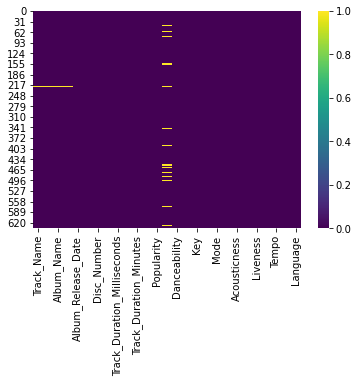

In [ ]:
# Visualizing the missing values

sns.heatmap(devotional1.isnull(), cbar = "True", cmap = 'viridis')

In [ ]:
devotional1.isnull().sum()

Track_Name                      2
Artist_Name                     2
Album_Name                      2
Album_Artist_Name               2
Album_Release_Date              0
Album_Release_Year              0
Disc_Number                     0
Track_Number                    0
Track_Duration_Milliseconds     0
Track_Duration_Seconds          0
Track_Duration_Minutes          0
Explicit                        0
Popularity                      0
Artist_Genres                  39
Danceability                    0
Energy                          0
Key                             0
Loudness                        0
Mode                            0
Speechiness                     0
Acousticness                    0
Instrumentalness                0
Liveness                        0
Valence                         0
Tempo                           0
Time_Signature                  0
Language                        0
dtype: int64

In [ ]:
devotional1.isnull().values.any()

True

In [ ]:
devotional1["Album_Name"].fillna("Unknown", inplace = True)

In [ ]:
devotional1["Album_Release_Date"].fillna("0000-00-00", inplace = True)

In [ ]:
devotional1["Album_Release_Year"].fillna("0000", inplace = True)

In [ ]:
devotional1["Album_Artist_Name"].fillna("Unknown", inplace = True)

In [ ]:
devotional1["Artist_Genres"].fillna("Unknown", inplace = True)

In [ ]:
devotional1["Danceability"].fillna("0.0", inplace = True)

In [ ]:
devotional1["Energy"].fillna("0.0", inplace = True)

In [ ]:
devotional1["Key"].fillna("0.0", inplace = True)

In [ ]:
devotional1["Loudness"].fillna("0.0", inplace = True)

In [ ]:
devotional1["Mode"].fillna("0.0", inplace = True)

In [ ]:
devotional1["Speechiness"].fillna("0.0", inplace = True)

In [ ]:
devotional1["Acousticness"].fillna("0.0", inplace = True)

In [ ]:
devotional1["Instrumentalness"].fillna("0.0", inplace = True)

In [ ]:
devotional1["Liveness"].fillna("0.0", inplace = True)

In [ ]:
devotional1["Valence"].fillna("0.0", inplace = True)

In [ ]:
devotional1["Tempo"].fillna("0.0", inplace = True)

In [ ]:
devotional1["Time_Signature"].fillna("0.0", inplace = True)

In [ ]:
devotional1["Language"].fillna("Unknown", inplace = True)

In [ ]:
# Dropping Track_Name missing values and Artist_Name becoz its of no use now

devotional1.dropna(subset=['Artist_Name'])

,Track_Name,Artist_Name,Album_Name,Album_Artist_Name,Album_Release_Date,Album_Release_Year,Disc_Number,Track_Number,Track_Duration_Milliseconds,Track_Duration_Seconds,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature,Language
0,Sri Venkatesa Suprabatham,Anuradha Krishnamoorthy,Suprabatham,Anuradha Krishnamoorthy,21-11-1999,1999,1,1,1301269,1301.269,...,-5.947,1,0.0541,0.7660,0.000000,0.0895,0.835,86.747,3,Telugu
1,Shree Ganeshay Dheemahi,Ajay-Atul,Ganesha Symphonic Chants Experience,Ajay-Atul,2001,,1,3,407706,407.706,...,-15.063,0,0.0331,0.7280,0.000000,0.1020,0.512,139.832,4,Telugu
2,Kondalalo Nelakonna,"Annamayya Keerthana, S. P. Balasubrahmanyam",Annamayya,M. M. Keeravani,01-01-1997,1997,1,12,89202,89.202,...,-8.058,1,0.0903,0.5360,0.007540,0.2730,0.611,77.854,4,Telugu
3,Paluke Bangaramayera,"M. M. Keeravani, K. S. Chithra",Sri Ramadasu,M. M. Keeravani,13-01-2006,2006,1,13,237718,237.718,...,-7.138,0,0.0279,0.6720,0.000000,0.0810,0.492,95.933,4,Telugu
4,Andhari Bhanduvayya,S. P. Balasubrahmanyam,Devullu,Vandemataram Srinivas,09-05-2001,2001,1,2,340656,340.656,...,-5.127,0,0.0856,0.1870,0.000000,0.7370,0.703,89.943,4,Telugu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,Narayana Manthram,P. Susheela,Bhakta Prahalada,"S. Rajeswara Rao, S.N.Rajeswari Rao",31-12-1974,1974,1,1,202493,202.493,...,-4.290,1,0.0379,0.9390,0.229000,0.6070,0.561,79.362,4,Telugu
633,Sri Seetharamula Kalyanam,P. Susheela,Seetharama Kalyanam,Various Artists,31-12-1961,1961,1,4,349866,349.866,...,-12.154,0,0.0995,0.9400,0.820000,0.3890,0.856,156.954,4,Telugu
634,Dandakam,"Gangadhar Sastry, Gopichand",Nijam,R. P. Patnaik,23-05-2003,2003,1,5,112277,112.277,...,-5.045,1,0.1310,0.0204,0.000013,0.0889,0.570,91.486,3,Telugu
635,Deva Devam,Palakkad Shreeram|Rita,Attarrintiki Daaredi,Devi Sri Prasad,19-07-2013,2013,1,3,104504,104.504,...,-5.604,1,0.2190,0.4480,0.000000,0.1090,0.695,175.876,5,Telugu


In [ ]:
devotional1.isnull().sum()

Track_Name                     2
Artist_Name                    2
Album_Name                     0
Album_Artist_Name              0
Album_Release_Date             0
Album_Release_Year             0
Disc_Number                    0
Track_Number                   0
Track_Duration_Milliseconds    0
Track_Duration_Seconds         0
Track_Duration_Minutes         0
Explicit                       0
Popularity                     0
Artist_Genres                  0
Danceability                   0
Energy                         0
Key                            0
Loudness                       0
Mode                           0
Speechiness                    0
Acousticness                   0
Instrumentalness               0
Liveness                       0
Valence                        0
Tempo                          0
Time_Signature                 0
Language                       0
dtype: int64

In [ ]:
devotional1.isnull().sum().sum()

4

In [ ]:
nan_rows = devotional1[devotional1['Track_Name'].isnull()]
nan_rows

,Track_Name,Artist_Name,Album_Name,Album_Artist_Name,Album_Release_Date,Album_Release_Year,Disc_Number,Track_Number,Track_Duration_Milliseconds,Track_Duration_Seconds,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature,Language
222,NaN,NaN,Unknown,Unknown,01-04-2002,2002,1,3,609802,609.802,...,-9.792,0,0.0299,0.887,0.0,0.0613,0.767,85.682,4,Telugu
223,NaN,NaN,Unknown,Unknown,01-04-2002,2002,1,2,770063,770.063,...,-12.015,1,0.2750,0.769,0.0,0.3710,0.936,152.705,3,Telugu


In [ ]:
devotional1.drop([222, 223], axis=0, inplace = True)

In [ ]:
devotional1.isnull().sum()

Track_Name                     0
Artist_Name                    0
Album_Name                     0
Album_Artist_Name              0
Album_Release_Date             0
Album_Release_Year             0
Disc_Number                    0
Track_Number                   0
Track_Duration_Milliseconds    0
Track_Duration_Seconds         0
Track_Duration_Minutes         0
Explicit                       0
Popularity                     0
Artist_Genres                  0
Danceability                   0
Energy                         0
Key                            0
Loudness                       0
Mode                           0
Speechiness                    0
Acousticness                   0
Instrumentalness               0
Liveness                       0
Valence                        0
Tempo                          0
Time_Signature                 0
Language                       0
dtype: int64

In [ ]:
devotional1.isnull().sum().sum()

0

In [ ]:
nan_rows = devotional1[devotional1['Artist_Name'].isnull()]
nan_rows

,Track_Name,Artist_Name,Album_Name,Album_Artist_Name,Album_Release_Date,Album_Release_Year,Disc_Number,Track_Number,Track_Duration_Milliseconds,Track_Duration_Seconds,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature,Language


In [ ]:
devotional1.drop([3801, 3806], axis=0, inplace = True)

KeyError: '[3801 3806] not found in axis'

In [ ]:
devotional1.isnull().sum().sum()

0

In [ ]:
devotional1.isnull().sum()

Track_Name                     0
Artist_Name                    0
Album_Name                     0
Album_Artist_Name              0
Album_Release_Date             0
Album_Release_Year             0
Disc_Number                    0
Track_Number                   0
Track_Duration_Milliseconds    0
Track_Duration_Seconds         0
Track_Duration_Minutes         0
Explicit                       0
Popularity                     0
Artist_Genres                  0
Danceability                   0
Energy                         0
Key                            0
Loudness                       0
Mode                           0
Speechiness                    0
Acousticness                   0
Instrumentalness               0
Liveness                       0
Valence                        0
Tempo                          0
Time_Signature                 0
Language                       0
dtype: int64

In [ ]:
devotional1.shape

(635, 27)

### Checking and Removing Duplicate values()

In [ ]:
devotional1.duplicated().sum()

1

In [ ]:
devotional1.drop_duplicates(inplace = True)

In [ ]:
devotional1.shape

(634, 27)

In [ ]:
devotional1.duplicated().sum()

0

### Saving Dataset 

In [ ]:
devotional1.to_csv('telugu_devotional_songs_new.csv',index = False)

In [ ]:
devotional1_new = pd.read_csv('telugu_devotional_songs_new.csv')

In [ ]:
devotional1_new.head()

,Track_Name,Artist_Name,Album_Name,Album_Artist_Name,Album_Release_Date,Album_Release_Year,Disc_Number,Track_Number,Track_Duration_Milliseconds,Track_Duration_Seconds,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature,Language
0,Sri Venkatesa Suprabatham,Anuradha Krishnamoorthy,Suprabatham,Anuradha Krishnamoorthy,21-11-1999,1999.0,1,1,1301269,1301.269,...,-5.947,1,0.0541,0.766,0.00000,0.0895,0.835,86.747,3,Telugu
1,Shree Ganeshay Dheemahi,Ajay-Atul,Ganesha Symphonic Chants Experience,Ajay-Atul,2001,NaN,1,3,407706,407.706,...,-15.063,0,0.0331,0.728,0.00000,0.1020,0.512,139.832,4,Telugu
2,Kondalalo Nelakonna,"Annamayya Keerthana, S. P. Balasubrahmanyam",Annamayya,M. M. Keeravani,01-01-1997,1997.0,1,12,89202,89.202,...,-8.058,1,0.0903,0.536,0.00754,0.2730,0.611,77.854,4,Telugu
3,Paluke Bangaramayera,"M. M. Keeravani, K. S. Chithra",Sri Ramadasu,M. M. Keeravani,13-01-2006,2006.0,1,13,237718,237.718,...,-7.138,0,0.0279,0.672,0.00000,0.0810,0.492,95.933,4,Telugu
4,Andhari Bhanduvayya,S. P. Balasubrahmanyam,Devullu,Vandemataram Srinivas,09-05-2001,2001.0,1,2,340656,340.656,...,-5.127,0,0.0856,0.187,0.00000,0.7370,0.703,89.943,4,Telugu


In [ ]:
devotional1_new.shape

(634, 27)

## Analyzing Data

### Hindi Songs

In [1]:
devo1_new = pd.read_csv('hindi_devotional_songs_new.csv')

NameError: ignored

In [ ]:
devo1_new.head()

In [ ]:
devo1_new.shape

In [ ]:
devo1_new.dtypes

###### Energy Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Energy", data = devo1_new, ax=ax )

There is an increase in Energy after 1975

###### Acousticness Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Acousticness", data = devo1_new, ax=ax )

There is an decrease in Acousticness after 1970

###### Which songs has most popularities?

In [ ]:
highest_rated_songs1 = devo1_new['Popularity'].sort_values(ascending=False).head(5)
highest_rated_songs1

In [ ]:
highest_rated_songs1.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The highest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(highest_rated_songs1.index):
    plt.text(x=x-0.1,y=highest_rated_songs1.loc[index],s='{:.2f}'.format(highest_rated_songs1.loc[index]),fontsize=12)


In [ ]:
top10_songs = devo1_new.nlargest(10, 'Popularity')
fig = px.bar(top10_songs, x='Track_Name', y=['Energy', 'Danceability' ,'Popularity'], barmode='group')
fig.show()

###### Which songs has lowest popularities?

In [ ]:
lowest_rated_songs1 = devo1_new['Popularity'].sort_values(ascending=True).head(5)
lowest_rated_songs1

In [ ]:
lowest_rated_songs1.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The lowest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(lowest_rated_songs1.index):
    plt.text(x=x-0.1,y=lowest_rated_songs1.loc[index],s='{:.2f}'.format(lowest_rated_songs1.loc[index]),fontsize=12)

###### Which artist has worked on most songs?

In [ ]:
top_artists = devo1_new[['Artist_Name']].sort_values('Artist_Name', ascending = False).value_counts()

In [ ]:
top_artists

In [ ]:
plt.figure(figsize = (15, 15))
chart = sns.barplot('Artist_Name', data = top_artists, palette = 'vlag')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
chart.set(xlabel = 'Artist', ylabel = 'No. Of Songs')

###### Relation Between Danceability and Energy

In [ ]:
sns.jointplot(x = 'Energy', y = 'Danceability', data = devo1_new[['Energy', 'Danceability']], kind = 'hex').set_axis_labels('Energy', 'Danceability')

Energy and danceability are highly correlated. Most numbers of songs have energy between 0.4 to 0.6 index while most songs have danceability between 0.4 to 0.7.

###### Who makes the most “Danceable” music?

In [ ]:
devo1_new[['Artist_Name', 'Danceability']].sort_values('Danceability', ascending = False)[0:10]

###### Most Popular Genres

In [ ]:
devo1_new[['Artist_Genres', 'Popularity']].sort_values('Popularity', ascending = False)[0:10]

In [ ]:
top10_genres = devo1_new.nlargest(10, 'Popularity')
fig = px.bar(top10_genres, x='Artist_Genres', y=['Energy', 'Danceability', 'Acousticness'], barmode='group')
fig.show()

### Marathi Songs

In [ ]:
devo2_new = pd.read_csv('marathi_devotional_songs_new.csv')

In [ ]:
devo2_new.head()

In [ ]:
devo2_new.shape

In [ ]:
devo2_new.dtypes

###### Energy Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Energy", data = devo2_new, ax=ax )

There is an increase in Energy after 1980

###### Acousticness Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Acousticness", data = devo2_new, ax=ax )

There is an decrease in Acousticness after 1980

###### Which songs has most popularities?

In [ ]:
highest_rated_songs2 = devo2_new['Popularity'].sort_values(ascending=False).head(5)
highest_rated_songs2

In [ ]:
highest_rated_songs2.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The highest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(highest_rated_songs2.index):
    plt.text(x=x-0.1,y=highest_rated_songs2.loc[index],s='{:.2f}'.format(highest_rated_songs2.loc[index]),fontsize=12)


In [ ]:
top10_songs = devo2_new.nlargest(10, 'Popularity')
fig = px.bar(top10_songs, x='Track_Name', y=['Energy', 'Danceability' ,'Popularity'], barmode='group')
fig.show()

###### Which songs has lowest popularities?

In [ ]:
lowest_rated_songs2 = devo2_new['Popularity'].sort_values(ascending=True).head(5)
lowest_rated_songs2

In [ ]:
lowest_rated_songs2.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The lowest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(lowest_rated_songs2.index):
    plt.text(x=x-0.1,y=lowest_rated_songs2.loc[index],s='{:.2f}'.format(lowest_rated_songs2.loc[index]),fontsize=12)


###### Which artist has worked on most songs?

In [ ]:
top_artists = devo2_new[['Artist_Name']].sort_values('Artist_Name', ascending = False).value_counts()

In [ ]:
top_artists

In [ ]:
plt.figure(figsize = (15, 15))
chart = sns.barplot('Artist_Name', data = top_artists, palette = 'vlag')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
chart.set(xlabel = 'Artist', ylabel = 'No. Of Songs')

###### Relation Between Danceability and Energy

In [ ]:
sns.jointplot(x = 'Energy', y = 'Danceability', data = devo2_new[['Energy', 'Danceability']], kind = 'hex').set_axis_labels('Energy', 'Danceability')

Energy and danceability are highly correlated. Most numbers of songs have energy between 0.4 to 0.6 index while numbers of songs have danceability between 0.4 to 0.6.

###### Who makes the most “Danceable” music?

In [ ]:
devo1_new[['Artist_Name', 'Danceability']].sort_values('Danceability', ascending = False)[0:10]

###### Most Popular Genres

In [ ]:
devo1_new[['Artist_Genres', 'Popularity']].sort_values('Popularity', ascending = False)[0:10]

In [ ]:
top10_genres = devo2_new.nlargest(10, 'Popularity')
fig = px.bar(top10_genres, x='Artist_Genres', y=['Energy', 'Danceability', 'Acousticness'], barmode='group')
fig.show()

### Gujarati Songs

In [ ]:
devo3_new = pd.read_csv('gujarati_devotional_songs_new.csv')

In [ ]:
devo3_new.head()

In [ ]:
devo3_new.shape

In [ ]:
devo3_new.dtypes

###### Energy Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Energy", data = devo3_new, ax=ax )

There is an increase in Energy after 1970

###### Acousticnes Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Acousticness", data = devo3_new, ax=ax )

There is an decrease in Acousticness after 1965

###### Which songs has most popularities?

In [ ]:
highest_rated_songs3 = devo3_new['Popularity'].sort_values(ascending=False).head(5)
highest_rated_songs3

In [ ]:
highest_rated_songs3.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The highest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(highest_rated_songs3.index):
    plt.text(x=x-0.1,y=highest_rated_songs3.loc[index],s='{:.2f}'.format(highest_rated_songs3.loc[index]),fontsize=12)


In [ ]:
top10_songs = devo3_new.nlargest(10, 'Popularity')
fig = px.bar(top10_songs, x='Track_Name', y=['Energy', 'Danceability' ,'Popularity'], barmode='group')
fig.show()

###### Which songs has lowest popularities?

In [ ]:
lowest_rated_songs3 = devo3_new['Popularity'].sort_values(ascending=True).head(5)
lowest_rated_songs3

In [ ]:
lowest_rated_songs3.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The lowest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(lowest_rated_songs3.index):
    plt.text(x=x-0.1,y=lowest_rated_songs3.loc[index],s='{:.2f}'.format(lowest_rated_songs3.loc[index]),fontsize=12)

###### Which artist has worked on most songs?

In [ ]:
top_artists = devo3_new[['Artist_Name']].sort_values('Artist_Name', ascending = False).value_counts()

In [ ]:
top_artists

In [ ]:
plt.figure(figsize = (15, 15))
chart = sns.barplot('Artist_Name', data = top_artists, palette = 'vlag')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
chart.set(xlabel = 'Artist', ylabel = 'No. Of Songs')

###### Relation Between Danceability and Energy

In [ ]:
sns.jointplot(x = 'Energy', y = 'Danceability', data = devo3_new[['Energy', 'Danceability']], kind = 'hex').set_axis_labels('Energy', 'Danceability')

Energy and danceability are highly correlated. Most numbers of songs have energy between 0.4 to 0.6 index while most numbers of songs have danceability between 0.4 to 0.6.

###### Who makes the most “Danceable” music?

In [ ]:
devo3_new[['Artist_Name', 'Danceability']].sort_values('Danceability', ascending = False)[0:10]

###### Most Popular Genres

In [ ]:
devo3_new[['Artist_Genres', 'Popularity']].sort_values('Popularity', ascending = False)[0:10]

In [ ]:
top10_genres = devo3_new.nlargest(10, 'Popularity')
fig = px.bar(top10_genres, x='Artist_Genres', y=['Energy', 'Danceability', 'Acousticness'], barmode='group')
fig.show()

### Punjabi Songs

In [ ]:
devo4_new = pd.read_csv('punjabi_devotional_songs_new.csv')

In [ ]:
devo4_new.head()

In [ ]:
devo4_new.shape

In [ ]:
devo4_new.dtypes

###### Energy Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Energy", data = devo4_new, ax=ax )

There is an increase in Energy after 1990

###### Acousticnes Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Acousticness", data = devo4_new, ax=ax )

There is an decrease in Acousticness after 2000

###### Which songs has most popularities?

In [ ]:
highest_rated_songs4 = devo4_new['Popularity'].sort_values(ascending=False).head(5)
highest_rated_songs4

In [ ]:
highest_rated_songs4.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The highest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(highest_rated_songs4.index):
    plt.text(x=x-0.1,y=highest_rated_songs4.loc[index],s='{:.2f}'.format(highest_rated_songs4.loc[index]),fontsize=12)


In [ ]:
top10_songs = devo4_new.nlargest(10, 'Popularity')
fig = px.bar(top10_songs, x='Track_Name', y=['Energy', 'Danceability' ,'Popularity'], barmode='group')
fig.show()

###### Which songs has lowest popularities?

In [ ]:
lowest_rated_songs4 = devo4_new['Popularity'].sort_values(ascending=True).head(5)
lowest_rated_songs4

In [ ]:
lowest_rated_songs4.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The lowest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(lowest_rated_songs4.index):
    plt.text(x=x-0.1,y=lowest_rated_songs4.loc[index],s='{:.2f}'.format(lowest_rated_songs4.loc[index]),fontsize=12)

###### Which artist has worked on most songs?

In [ ]:
top_artists = devo4_new[['Artist_Name']].sort_values('Artist_Name', ascending = False).value_counts()

In [ ]:
top_artists

In [ ]:
plt.figure(figsize = (15, 15))
chart = sns.barplot('Artist_Name', data = top_artists, palette = 'vlag')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
chart.set(xlabel = 'Artist', ylabel = 'No. Of Songs')

###### Relation Between Danceability and Energy

In [ ]:
sns.jointplot(x = 'Energy', y = 'Danceability', data = devo4_new[['Energy', 'Danceability']], kind = 'hex').set_axis_labels('Energy', 'Danceability')

Energy and danceability are highly correlated. Most numbers of songs have energy between 0.4 to 0.7 index while most numbers of songs have danceability between 0.4 to 0.8.

###### Who makes the most “Danceable” music?

In [ ]:
devo4_new[['Artist_Name', 'Danceability']].sort_values('Danceability', ascending = False)[0:10]

###### Most Popular Genres

In [ ]:
devo4_new[['Artist_Genres', 'Popularity']].sort_values('Popularity', ascending = False)[0:10]

In [ ]:
top10_genres = devo4_new.nlargest(10, 'Popularity')
fig = px.bar(top10_genres, x='Artist_Genres', y=['Energy', 'Danceability', 'Acousticness'], barmode='group')
fig.show()

### Sanskrit Songs

In [ ]:
devo5_new = pd.read_csv('sanskrit_devotional_songs_new.csv')

In [ ]:
devo5_new.head()

In [ ]:
devo5_new.shape

In [ ]:
devo5_new.dtypes

###### Energy Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Energy", data = devo5_new, ax=ax )

There was an increase in Energy between 1980 to 1995

###### Acousticnes Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Acousticness", data = devo5_new, ax=ax )

There is an consistency in Acousticness 

###### Which songs has most popularities?

In [ ]:
highest_rated_songs5 = devo5_new['Popularity'].sort_values(ascending=False).head(5)
highest_rated_songs5

In [ ]:
highest_rated_songs5.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The highest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(highest_rated_songs5.index):
    plt.text(x=x-0.1,y=highest_rated_songs5.loc[index],s='{:.2f}'.format(highest_rated_songs5.loc[index]),fontsize=12)


In [ ]:
top10_songs = devo5_new.nlargest(10, 'Popularity')
fig = px.bar(top10_songs, x='Track_Name', y=['Energy', 'Danceability' ,'Popularity'], barmode='group')
fig.show()

###### Which songs has lowest popularities?

In [ ]:
lowest_rated_songs5 = devo5_new['Popularity'].sort_values(ascending=True).head(5)
lowest_rated_songs5

In [ ]:
lowest_rated_songs5.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The lowest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(lowest_rated_songs5.index):
    plt.text(x=x-0.1,y=lowest_rated_songs5.loc[index],s='{:.2f}'.format(lowest_rated_songs5.loc[index]),fontsize=12)

###### Which artist has worked on most songs?

In [ ]:
top_artists = devo5_new[['Artist_Name']].sort_values('Artist_Name', ascending = False).value_counts()

In [ ]:
top_artists

In [ ]:
plt.figure(figsize = (15, 15))
chart = sns.barplot('Artist_Name', data = top_artists, palette = 'vlag')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
chart.set(xlabel = 'Artist', ylabel = 'No. Of Songs')

###### Relation Between Danceability and Energy

In [ ]:
sns.jointplot(x = 'Energy', y = 'Danceability', data = devo5_new[['Energy', 'Danceability']], kind = 'hex').set_axis_labels('Energy', 'Danceability')

Energy and danceability are highly correlated. Most numbers of songs have energy between 0.0 to 0.5 index while most numbers of songs have danceability between 0.1 to 0.7.

###### Who makes the most “Danceable” music?

In [ ]:
devo5_new[['Artist_Name', 'Danceability']].sort_values('Danceability', ascending = False)[0:10]

###### Most Popular Genres

In [ ]:
devo5_new[['Artist_Genres', 'Popularity']].sort_values('Popularity', ascending = False)[0:10]

In [ ]:
top10_genres = devo5_new.nlargest(10, 'Popularity')
fig = px.bar(top10_genres, x='Artist_Genres', y=['Energy', 'Danceability', 'Acousticness'], barmode='group')
fig.show()

### Tamil Songs

In [ ]:
devo6_new = pd.read_csv('tamil_devotional_songs_new.csv')

In [ ]:
devo6_new.head()

In [ ]:
devo6_new.shape

In [ ]:
devo6_new.dtypes

###### Energy Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Energy", data = devo6_new, ax=ax )

There is an increase in Energy after 1965

###### Acousticnes Trend According to the Years

In [ ]:
ig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Acousticness", data = devo6_new, ax=ax )

There is an decrease in Acousticness after 1970

###### Which songs has most popularities?

In [ ]:
highest_rated_songs6 = devo6_new['Popularity'].sort_values(ascending=False).head(5)
highest_rated_songs6

In [ ]:
highest_rated_songs6.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The highest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(highest_rated_songs6.index):
    plt.text(x=x-0.1,y=highest_rated_songs6.loc[index],s='{:.2f}'.format(highest_rated_songs6.loc[index]),fontsize=12)


In [ ]:
top10_songs = devo6_new.nlargest(10, 'Popularity')
fig = px.bar(top10_songs, x='Track_Name', y=['Energy', 'Danceability' ,'Popularity'], barmode='group')
fig.show()

###### Which songs has lowest popularities?

In [ ]:
lowest_rated_songs6 = devo6_new['Popularity'].sort_values(ascending=True).head(5)
lowest_rated_songs6

In [ ]:
lowest_rated_songs6.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The lowest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(lowest_rated_songs6.index):
    plt.text(x=x-0.1,y=lowest_rated_songs6.loc[index],s='{:.2f}'.format(lowest_rated_songs6.loc[index]),fontsize=12)

###### Which artist has worked on most songs?

In [ ]:
top_artists = devo6_new[['Artist_Name']].sort_values('Artist_Name', ascending = False).value_counts()

In [ ]:
top_artists

In [ ]:
plt.figure(figsize = (15, 15))
chart = sns.barplot('Artist_Name', data = top_artists, palette = 'vlag')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
chart.set(xlabel = 'Artist', ylabel = 'No. Of Songs')

###### Relation Between Danceability and Energy

In [ ]:
sns.jointplot(x = 'Energy', y = 'Danceability', data = devo6_new[['Energy', 'Danceability']], kind = 'hex').set_axis_labels('Energy', 'Danceability')

Energy and danceability are highly correlated. Most numbers of songs have energy between 0.4 to 0.7 index while most numbers of songs have danceability between 0.4 to 0.6.

###### Who makes the most “Danceable” music?

In [ ]:
devo6_new[['Artist_Name', 'Danceability']].sort_values('Danceability', ascending = False)[0:10]

###### Most Popular Genres

In [ ]:
devo6_new[['Artist_Genres', 'Popularity']].sort_values('Popularity', ascending = False)[0:10]

In [ ]:
top10_genres = devo6_new.nlargest(10, 'Popularity')
fig = px.bar(top10_genres, x='Artist_Genres', y=['Energy', 'Danceability', 'Acousticness'], barmode='group')
fig.show()

### Telugu Songs

In [ ]:
devo7_new = pd.read_csv('telugu_devotional_songs_new.csv')

In [ ]:
devo7_new.head()

In [ ]:
devo7_new.shape

In [ ]:
devo7_new.dtypes

###### Energy Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Energy", data = devo7_new, ax=ax )

There is no increase in Energy 

###### Acousticnes Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Acousticness", data = devo7_new, ax=ax )

There is an decrease in Acousticness after 1980

###### Which songs has most popularities?

In [ ]:
highest_rated_songs7 = devo7_new['Popularity'].sort_values(ascending=False).head(5)
highest_rated_songs7

In [ ]:
highest_rated_songs7.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The highest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(highest_rated_songs7.index):
    plt.text(x=x-0.1,y=highest_rated_songs7.loc[index],s='{:.2f}'.format(highest_rated_songs7.loc[index]),fontsize=12)


In [ ]:
top10_songs = devo7_new.nlargest(10, 'Popularity')
fig = px.bar(top10_songs, x='Track_Name', y=['Energy', 'Danceability' ,'Popularity'], barmode='group')
fig.show()

###### Which songs has lowest popularities?

In [ ]:
lowest_rated_songs7 = devo7_new['Popularity'].sort_values(ascending=True).head(5)
lowest_rated_songs7

In [ ]:
lowest_rated_songs7.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The lowest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(lowest_rated_songs7.index):
    plt.text(x=x-0.1,y=lowest_rated_songs7.loc[index],s='{:.2f}'.format(lowest_rated_songs7.loc[index]),fontsize=12)

###### Which artist has worked on most songs?

In [ ]:
top_artists = devo7_new[['Artist_Name']].sort_values('Artist_Name', ascending = False).value_counts()

In [ ]:
top_artists

In [ ]:
plt.figure(figsize = (15, 15))
chart = sns.barplot('Artist_Name', data = top_artists, palette = 'vlag')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
chart.set(xlabel = 'Artist', ylabel = 'No. Of Songs')

###### Relation Between Danceability and Energy

In [ ]:
sns.jointplot(x = 'Energy', y = 'Danceability', data = devo7_new[['Energy', 'Danceability']], kind = 'hex').set_axis_labels('Energy', 'Danceability')

Energy and danceability are highly correlated. Most numbers of songs have energy between 0.3 TO 0.6 index while most numbers of songs have danceability between 0.4 to 0.6.

###### Who makes the most “Danceable” music?

In [ ]:
devo7_new[['Artist_Name', 'Danceability']].sort_values('Danceability', ascending = False)[0:10]

###### Most Popular Genres

In [ ]:
devo7_new[['Artist_Genres', 'Popularity']].sort_values('Popularity', ascending = False)[0:10]

In [ ]:
top10_genres = devo7_new.nlargest(10, 'Popularity')
fig = px.bar(top10_genres, x='Artist_Genres', y=['Energy', 'Danceability', 'Acousticness'], barmode='group')
fig.show()

### Malayalam Songs

In [ ]:
devo8_new = pd.read_csv('malayalam_devotional_songs_new.csv')

In [ ]:
devo8_new.head()

In [ ]:
devo8_new.shape

In [ ]:
devo8_new.dtypes

###### Energy Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Energy", data = devo8_new, ax=ax )

There is a consistency in Energy after 1990

###### Acousticnes Trend According to the Years

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "Album_Release_Year", y = "Acousticness", data = devo8_new, ax=ax )

There is an decrease in Acousticness after 1960

###### Which songs has most popularities?

In [ ]:
highest_rated_songs8 = devo8_new['Popularity'].sort_values(ascending=False).head(5)
highest_rated_songs8

In [ ]:
highest_rated_songs8.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The highest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(highest_rated_songs8.index):
    plt.text(x=x-0.1,y=highest_rated_songs8.loc[index],s='{:.2f}'.format(highest_rated_songs8.loc[index]),fontsize=12)

In [ ]:
top10_songs = devo8_new.nlargest(10, 'Popularity')
fig = px.bar(top10_songs, x='Track_Name', y=['Energy', 'Danceability' ,'Popularity'], barmode='group')
fig.show()

###### Which songs has lowest popularities?

In [ ]:
lowest_rated_songs8 = devo8_new['Popularity'].sort_values(ascending=True).head(5)
lowest_rated_songs8

In [ ]:
lowest_rated_songs8.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The lowest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(lowest_rated_songs8.index):
    plt.text(x=x-0.1,y=lowest_rated_songs8.loc[index],s='{:.2f}'.format(lowest_rated_songs8.loc[index]),fontsize=12)

###### Which artist has worked on most songs?

In [ ]:
top_artists = devo8_new[['Artist_Name']].sort_values('Artist_Name', ascending = False).value_counts()

In [ ]:
top_artists

In [ ]:
plt.figure(figsize = (15, 15))
chart = sns.barplot('Artist_Name', data = top_artists, palette = 'vlag')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
chart.set(xlabel = 'Artist', ylabel = 'No. Of Songs')

###### Relation Between Danceability and Energy

In [ ]:
sns.jointplot(x = 'Energy', y = 'Danceability', data = devo8_new[['Energy', 'Danceability']], kind = 'hex').set_axis_labels('Energy', 'Danceability')

Energy and danceability are highly correlated. Most numbers of songs have energy between 0.4 to 0.6 index while most numbers of songs have danceability between 0.4 to 0.7.

###### Who makes the most “Danceable” music?

In [ ]:
devo8_new[['Artist_Name', 'Danceability']].sort_values('Danceability', ascending = False)[0:10]

###### Most Popular Genres

In [ ]:
devo8_new[['Artist_Genres', 'Popularity']].sort_values('Popularity', ascending = False)[0:10]

In [ ]:
top10_genres = devo8_new.nlargest(10, 'Popularity')
fig = px.bar(top10_genres, x='Artist_Genres', y=['Energy', 'Danceability', 'Acousticness'], barmode='group')
fig.show()

In [ ]:
import plotly.express as px 
sound_features = ['Acousticness', 'Instrumentalness']
fig = px.line(devo8_new, x='Album_Release_Year', y=sound_features)
fig.show()

In [ ]:
fig = px.line(devo8_new, x='Album_Release_Year', y='Tempo')
fig.show()

### Merging of multiple columns

In [ ]:
frames = [['hindi_devotional_songs_new.csv', 'marathi_devotional_songs_new.csv', 'gujarati_devotional_songs_new.csv', 'punjabi_devotional_songs_new.csv', 'sanskrit_devotional_songs_new.csv', 'malayalam_devotional_songs_new.csv', 'tamil_devotional_songs_new.csv', 'telugu_devotional_songs_new.csv']]

In [ ]:
#devo_merge = pd.concat(frames)
devo_merge = pd.concat(map(pd.read_csv, ['hindi_devotional_songs_new.csv', 'marathi_devotional_songs_new.csv', 'gujarati_devotional_songs_new.csv', 'punjabi_devotional_songs_new.csv', 'sanskrit_devotional_songs_new.csv', 'malayalam_devotional_songs_new.csv', 'tamil_devotional_songs_new.csv', 'telugu_devotional_songs_new.csv']), ignore_index = True)
devo_merge.head()

In [ ]:
devo_merge.info()

In [ ]:
devo_merge.shape

In [ ]:
devo_merge.to_csv('devo_merge_new.csv', index = False)

In [ ]:
devo_merge1 = pd.read_csv('devo_merge_new.csv')
devo_merge1.head()

In [ ]:
devo_merge1.columns

In [ ]:
devo_merge1.shape

In [ ]:
import plotly.express as px 
sound_features = ['Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Valence']
fig = px.line(devo_merge1, x='Album_Release_Year', y=sound_features)
fig.show()

In [ ]:
fig = px.line(devo_merge1, x='Album_Release_Year', y='Tempo')
fig.show()

In [ ]:
top10_artist = devo_merge1.nlargest(10, 'Popularity')
fig = px.bar(top10_artist, x='Artist_Name', y=['Energy' ,'Acousticness'], barmode='group')
fig.show()

In [ ]:
fig = px.line(devo_merge1, x='Popularity', y='Tempo')
fig.show()

In [ ]:
corr1 = devo_merge1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr1, xticklabels = corr1.columns, yticklabels=corr1.columns, annot  = True)

In [ ]:
sns.displot(devo_merge1['Popularity'])

In [ ]:
sns.jointplot(x = 'Energy', y = 'Danceability', data = devo_merge1[['Energy', 'Danceability']], kind = 'hex').set_axis_labels('Energy', 'Danceability')

In [ ]:
highest_rated_songs = devo_merge1['Popularity'].sort_values(ascending=False).head(5)
highest_rated_songs

In [ ]:
highest_rated_songs.plot(kind='bar', figsize=(12,7), color=sns.color_palette("BuGn_r"))
plt.title('The highest rated songs',fontsize=20)
plt.xlabel('Songs',fontsize=14)
plt.ylabel('Popularity',fontsize=14)
for x,index in enumerate(highest_rated_songs.index):
    plt.text(x=x-0.1,y=highest_rated_songs.loc[index],s='{:.2f}'.format(highest_rated_songs.loc[index]),fontsize=12)

In [ ]:
devo_merge1['Track_Number'].value_counts()

In [ ]:
sns.set_style(style = 'darkgrid')
sns.pairplot(devo_merge1)

In [ ]:
devo_merge1.corr(method ='kendall')

# Model Building

### Preparing a Model

In [ ]:
model = smf.ols('Popularity ~ Disc_Number + Track_Number + Track_Duration_Milliseconds + Track_Duration_Seconds + Track_Duration_Minutes + Explicit + Danceability + Energy + Key + Loudness + Mode + Speechiness + Acousticness + Instrumentalness + Liveness + Valence + Tempo + Time_Signature ', data = devo_merge1).fit()

In [ ]:
model.summary()

### Beta Coefficient

In [ ]:
model.params

### t values and p values

In [ ]:
print(model.tvalues, '\n' ,model.pvalues)

### R Squared values

In [ ]:
(model.rsquared, model.rsquared_adj)

In [ ]:
### Error and Predicted Values

In [ ]:
#devo_merge1['Predicted'] = model.fittedvalues
#devo_merge1['Errors'] = model.resid
#devo_merge1.head(500)

### Detecting Influencers/Outliers Using Cook's Distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [ ]:
# Plotting the influence values using stem plot
fig = plt.subplots(figsize = (15,10))
plt.stem(np.arange(len(devo_merge1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is greater than .5
(np.argmax(c), np.max(c))

In [ ]:
# Graphical Representation of High Influence Points
influence_plot(model)
plt.show()

In [ ]:
devo_merge1.shape

In [ ]:
# k = number of variables (columns)
# n = number of observations (rows)

k = devo_merge1.shape[1]
n = devo_merge1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

From the above plot, it is evident that data point 2944 is influencer

In [ ]:
devo_merge1[devo_merge1.index.isin([2944])]

In [ ]:
# Discard the data points which are influencers and reassign the row number (reset_index())
devo_merge2 = devo_merge1.drop(devo_merge1.index[[2944]],axis = 0).reset_index()

In [ ]:
# Building Recommendation Engine

In [ ]:
devo_merge2 = pd.DataFrame(devo_merge1.groupby('Track_Name')['Popularity'].mean())
devo_merge2

In [ ]:
devo_merge2_matrix = devo_merge1.pivot_table(index = 'Album_Name', columns = 'Track_Name', values ='Popularity')
devo_merge2_matrix.head()

In [ ]:
devo_merge2_matrix_new = devo_merge2_matrix.fillna(0)
devo_merge2_matrix_new.head()

In [ ]:
devo_merge2.sort_values('Popularity', ascending = False).head(40)

In [ ]:
devo_merge3 = devo_merge2_matrix_new["Devi Prayer"]

In [ ]:
similar_devo_merge3 = devo_merge2_matrix_new.corrwith(devo_merge3)
similar_devo_merge3

In [ ]:
corr_devo_merge3 = pd.DataFrame(similar_devo_merge3 , columns=['corr'])
corr_devo_merge3.dropna(inplace=True)
corr_devo_merge3.head()

In [ ]:
corr_devo_merge3_new = corr_devo_merge3.join(devo_merge2['Popularity'])
corr_devo_merge3_new

In [ ]:
devo_merge3_final = corr_devo_merge3_new[corr_devo_merge3_new['Popularity']>20].sort_values(by='corr', ascending = False)
devo_merge3_final

In [ ]:
devo_merge3_final_new = devo_merge3_final.drop('corr', axis=1)
devo_merge3_final_new